In [295]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings("ignore", category=FutureWarning)

In [296]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [297]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

In [298]:
#Loading the dataset
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
print(data.head())

   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  


In [299]:
#checking for Null or NaN values
print(data.isnull().sum())
print(data.isna().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64


In [300]:
#Info of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [301]:
#standard statistic measures
print(data.describe())

              age  tot_bilirubin  direct_bilirubin  tot_proteins      albumin  \
count  583.000000     583.000000        583.000000    583.000000   583.000000   
mean    44.746141       3.298799          1.486106    290.576329    80.713551   
std     16.189833       6.209522          2.808498    242.937989   182.620356   
min      4.000000       0.400000          0.100000     63.000000    10.000000   
25%     33.000000       0.800000          0.200000    175.500000    23.000000   
50%     45.000000       1.000000          0.300000    208.000000    35.000000   
75%     58.000000       2.600000          1.300000    298.000000    60.500000   
max     90.000000      75.000000         19.700000   2110.000000  2000.000000   

          ag_ratio        sgpt        sgot     alkphos  is_patient  
count   583.000000  583.000000  583.000000  579.000000  583.000000  
mean    109.910806    6.483190    3.141852    0.947064    1.286449  
std     288.918529    1.085451    0.795519    0.319592    0.452

In [302]:
#Removing the Null or NaN values.
data1 = data
data1 = data1.fillna(data1.mean())
print(data1.isna().sum())
print(data1.isnull().sum())

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64
age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64


As we can see above that now there is no NaN or Null values in the dataset. 

                       age  tot_bilirubin  direct_bilirubin  tot_proteins  \
age               1.000000       0.011763          0.007529      0.080425   
tot_bilirubin     0.011763       1.000000          0.874618      0.206669   
direct_bilirubin  0.007529       0.874618          1.000000      0.234939   
tot_proteins      0.080425       0.206669          0.234939      1.000000   
albumin           0.086883       0.214065          0.233894      0.125680   
ag_ratio          0.019910       0.237831          0.257544      0.167196   
sgpt              0.187461       0.008099          0.000139      0.028514   
sgot              0.265924       0.222250          0.228531      0.165453   
alkphos           0.216089       0.206159          0.200004      0.233960   
is_patient        0.137351       0.220208          0.246046      0.184866   

                   albumin  ag_ratio      sgpt      sgot   alkphos  is_patient  
age               0.086883  0.019910  0.187461  0.265924  0.216089    0

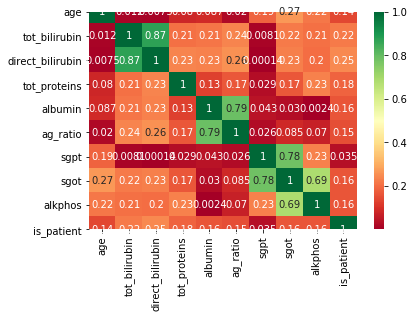

In [303]:
#Checking for Correlation as to reduce dimensionality
print(data1.corr().abs())
sns.heatmap(data1.corr().abs(), annot=True,cmap="RdYlGn")

As we can see above the highest correlation between different columns is 0.87("tot_bilirubin","direct_bilirubin"), which means they are 87% similar and 13% different. So, it is not appropriate to remove any of the coulmns. 

In [304]:
#Changing gender to Numeric values Female to 1 and Male to 0
data1["gender"] = data1["gender"].map({"Female":1, "Male":0})
print(data1["gender"].values)

[1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 

In [305]:
#Normalizing the dataset so that the data scales properly on the algorithms. 

min_max_scaler = preprocessing.MinMaxScaler()
X = data1.drop('is_patient', axis=1)
y = data1[["is_patient"]]

print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=99)
data_training = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
df = data_training.values
df_test = data_test.values
data_training = min_max_scaler.fit_transform(df)
data_testing = min_max_scaler.transform(df_test)

data_norm = pd.DataFrame(data_training, columns=data1.columns)
X_train = data_norm.drop("is_patient", axis=1)
y_train = data_norm[["is_patient"]]

data_normed = pd.DataFrame(data_testing, columns = data1.columns)
X_test = data_normed.drop("is_patient", axis=1)
y_test = data_normed[["is_patient"]]

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

print(len(data_norm))
print(len(data_normed))

583
583
408
175


In [306]:
#Feature Selection 
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)
print(X_train.columns)
rfe.fit(X_train, y_train)
print(rfe.ranking_)
print(X_train.columns[rfe.support_])

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos'],
      dtype='object')
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
[6 9 1 1 2 3 5 8 4 7]
Index(['tot_bilirubin', 'direct_bilirubin'], dtype='object')


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [307]:
#Univariate Selection 
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score')) 

           Features     Score
2     tot_bilirubin  6.898676
3  direct_bilirubin  6.847099
1            gender  2.643982
5           albumin  2.517531
6          ag_ratio  2.286247
4      tot_proteins  2.161537
8              sgot  0.759569
9           alkphos  0.571888
0               age  0.343602
7              sgpt  0.066495


[0.11007736 0.02615249 0.11463501 0.09931122 0.11941173 0.11600682
 0.12316449 0.09932011 0.09621079 0.09570998]


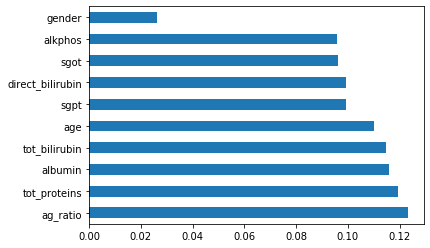

In [308]:
#Feature Importance
model = ExtraTreesClassifier()
model.fit(X_train,y_train.values.ravel())
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [309]:
print(y["is_patient"].value_counts())

0.0    416
1.0    167
Name: is_patient, dtype: int64


Objective of Under and Over Sampling :
            1) High Precision on Majority Class(0.0). High Precision indicates an example labeled as positive is                  indeed positive (small number of FP).
            2) High Recall of Minority Class(1.0). High Recall indicates the class is correctly recognized (small                number of FN).

[0.52020536 0.69548154]


/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/srix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


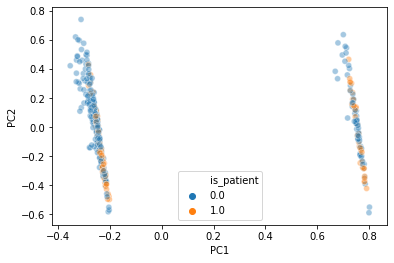

In [310]:
#
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_.cumsum())
y_temp = y_train
y_temp["PC1"] = X_pca[:,0]
y_temp["PC2"] = X_pca[:,1]
sns.scatterplot(data=y_temp, x="PC1", y="PC2", hue="is_patient", alpha=0.4)
# print(len(y), len(X_pca))
#print(pca.components_)

In [311]:
print(y_train.head())
y_train = y_train.drop(["PC1", "PC2"], axis=1)
print(y_train.head())

   is_patient       PC1       PC2
0         1.0 -0.203093 -0.476366
1         1.0 -0.225383 -0.340140
2         0.0  0.750240  0.113175
3         1.0 -0.219966 -0.335130
4         0.0 -0.287818  0.492670
   is_patient
0         1.0
1         1.0
2         0.0
3         1.0
4         0.0


In [312]:
def clfFitPredict(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    confusionMatrix(y_test, y_pred)

In [313]:
def confusionMatrix(y_test, y_pred):
    co = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix: \n'+str(co))
    
    total=co[0,0]+co[1,1]+co[0,1]+co[1,0]
    accuracy=(co[0,0]+co[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = co[0,0]/(co[0,0]+co[0,1])
    print('Sensitivity : '+ str(sensitivity ))
    
    precision = co[0,0]/(co[0,0]+co[1,0])
    print('Precision: ' + str(precision))

    specificity = co[1,1]/(co[1,0]+co[1,1])
    print('Specificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('F-Score : ' + str(fscore))
    
    print("\n",classification_report(y_test, y_pred), "\n")

In [314]:
def params(confusion_matrix):
    co = confusion_matrix
    print('\nConfusion Matrix By taking mean of all individual confusion matrix folds: \n'+str(co))
    
    total=co[0,0]+co[1,1]+co[0,1]+co[1,0]
    accuracy=(co[0,0]+co[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = co[0,0]/(co[0,0]+co[0,1])
    print('Sensitivity : '+ str(sensitivity ))
    
    precision = co[0,0]/(co[0,0]+co[1,0])
    print('Precision: ' + str(precision))

    specificity = co[1,1]/(co[1,0]+co[1,1])
    print('Specificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('F-Score : ' + str(fscore))

In [315]:
def crossValidation(clf, X, y, folds):
    #https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated
    scoreclf = cross_val_score(clf, X, y.values.ravel(), cv=folds)
    print(scoreclf,"\n")
    print(np.mean(scoreclf))
    
#     list_of_confmatrix = []
#     kf = KFold(n_splits = folds)
#     kf.get_n_splits(X)
#     for train_index, test_index in kf.split(X):
#         #print("TRAIN:", train_index, "TEST:", test_index)
#         X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#         y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
#         clf.fit(X_train_kf, y_train_kf.values.ravel())
#         confmatrix = confusion_matrix(y_test_kf, clf.predict(X_test_kf))
#         list_of_confmatrix.append(confmatrix)
    
#     mean_of_confmatrix = np.mean(list_of_confmatrix, axis=0)
#     params(mean_of_confmatrix)

In [316]:
print(y_train.columns)

Index(['is_patient'], dtype='object')


In [317]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On under sample dataset
print("Naive Bayes on Original dataset:")
clfFitPredict(GaussianNB(), X_train, X_test, y_train, y_test)

#Cross Validation on Naive Bayes on under sampled datset
print("\nCross Validation of Naive Bayes on Original dataset:")
crossValidation(GaussianNB(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Original dataset:

Confusion Matrix: 
[[48 77]
 [ 4 46]]

Accuracy : 0.5371428571428571
Sensitivity : 0.384
Precision: 0.9230769230769231
Specificity : 0.92
F-Score : 0.5423728813559322

               precision    recall  f1-score   support

         0.0       0.92      0.38      0.54       125
         1.0       0.37      0.92      0.53        50

    accuracy                           0.54       175
   macro avg       0.65      0.65      0.54       175
weighted avg       0.77      0.54      0.54       175
 


Cross Validation of Naive Bayes on Original dataset:
[0.60273973 0.54109589 0.52739726 0.55172414] 

0.5557392536608408

----------------------------------------------------------------------



In [318]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On the Original Dataset
print("SVM Classifier on Original dataset:")
clfFitPredict(LinearSVC(), X_train, X_test, y_train, y_test)

#Cross Validation on SVM Classifier on Orginial datset
print("\nCross Validation of SVM Classifier on Original dataset:")
crossValidation(LinearSVC(), X, y, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of SVM Classifier on Original dataset:
[0.73287671 0.70547945 0.69178082 0.73103448] 

0.7152928672649976

----------------------------------------------------------------------



In [319]:
#3 Logistic Regressor Classifier On the Original Dataset 
print("Logistic Regressor Classifier on Original dataset:")
clfFitPredict(LogisticRegression(), X_train, X_test, y_train, y_test)

#Cross Validation on Logistic Regressor Classifier on Orginial datset
print("\nCross Validation of Logistic Regressor Classifier on Original dataset:")
crossValidation(LogisticRegression(), X, y, 4)

Logistic Regressor Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 50   0]]

Accuracy : 0.7142857142857143
Sensitivity : 1.0
Precision: 0.7142857142857143
Specificity : 0.0
F-Score : 0.8333333333333333

               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       125
         1.0       0.00      0.00      0.00        50

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175
 


Cross Validation of Logistic Regressor Classifier on Original dataset:
[0.71917808 0.70547945 0.7260274  0.71724138] 

0.7169815777042986


/home/srix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [320]:
#4 KNN Classifier On the Original Dataset 
print(" KNN Classifier on Original dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train, X_test, y_train, y_test)

#Cross Validation on KNN Classifier on Orginial datset
print("\nCross Validation of  KNN Classifier  on Original dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X, y, 4)

 KNN Classifier on Original dataset:

Confusion Matrix: 
[[116   9]
 [ 44   6]]

Accuracy : 0.6971428571428572
Sensitivity : 0.928
Precision: 0.725
Specificity : 0.12
F-Score : 0.8140350877192983

               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81       125
         1.0       0.40      0.12      0.18        50

    accuracy                           0.70       175
   macro avg       0.56      0.52      0.50       175
weighted avg       0.63      0.70      0.63       175
 


Cross Validation of  KNN Classifier  on Original dataset:
[0.71232877 0.65068493 0.70547945 0.71034483] 

0.6947094945677845


In [321]:
#5 RandomForest Classifier On the Original Dataset 
print("RandomForest Classifier on Original dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train, X_test, y_train, y_test)

#Cross Validation on RandomForest Classifier on Orginial datset
print("\nCross Validation of  RandomForest Classifier on Original dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X, y, 4)

RandomForest Classifier on Original dataset:

Confusion Matrix: 
[[121   4]
 [ 43   7]]

Accuracy : 0.7314285714285714
Sensitivity : 0.968
Precision: 0.7378048780487805
Specificity : 0.14
F-Score : 0.8373702422145328

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84       125
         1.0       0.64      0.14      0.23        50

    accuracy                           0.73       175
   macro avg       0.69      0.55      0.53       175
weighted avg       0.71      0.73      0.66       175
 


Cross Validation of  RandomForest Classifier on Original dataset:
[0.68493151 0.70547945 0.71232877 0.71724138] 

0.7049952763344355


In [322]:
#6 Voting Classifier for Original Dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
print("Voting Classifier on Original dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train, X_test, y_train, y_test)

#Cross Validation on Voting Classifier on Orginial datset
print("\nCross Validation of Voting Classifier on Original dataset:")
crossValidation(vclf, X, y, 4)

Voting Classifier on Original dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of Voting Classifier on Original dataset:
[0.7260274  0.70547945 0.71232877 0.73103448] 

0.7187175247992443


In [323]:
print(data_norm["is_patient"].value_counts())

0.0    291
1.0    117
Name: is_patient, dtype: int64


In [324]:
count_0, count_1 = data_norm["is_patient"].value_counts()

data_class_0 = data_norm[data_norm["is_patient"]==0]
data_class_1 = data_norm[data_norm["is_patient"]==1]

data_class_0_under  = data_class_0.sample(count_1)
data_through_undersample = pd.concat([data_class_0_under, data_class_1], axis=0)
print("\nUndersampling\n")
print(data_through_undersample["is_patient"].value_counts())

data_class_1_over  = data_class_1.sample(count_0, replace=True)
data_through_oversample = pd.concat([data_class_0, data_class_1_over], axis=0)
print("\nOversampling\n")
print(data_through_oversample["is_patient"].value_counts())


Undersampling

1.0    117
0.0    117
Name: is_patient, dtype: int64

Oversampling

1.0    291
0.0    291
Name: is_patient, dtype: int64


In [325]:
print(data_through_undersample.info())
print("\n",data_through_undersample.head())
print("\n",data_through_undersample.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 53 to 407
Data columns (total 11 columns):
age                 234 non-null float64
gender              234 non-null float64
tot_bilirubin       234 non-null float64
direct_bilirubin    234 non-null float64
tot_proteins        234 non-null float64
albumin             234 non-null float64
ag_ratio            234 non-null float64
sgpt                234 non-null float64
sgot                234 non-null float64
alkphos             234 non-null float64
is_patient          234 non-null float64
dtypes: float64(11)
memory usage: 21.9 KB
None

           age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
53   0.666667     1.0       0.009868          0.000000      0.053249   
382  0.604938     0.0       0.016447          0.016484      0.085491   
343  0.345679     0.0       0.404605          0.335165      0.063996   
269  0.592593     0.0       0.006579          0.000000      0.052760   
193  0.493827     0.0       0.0131

In [326]:
print(data_through_oversample.info())
print("\n",data_through_oversample.head())
print("\n",data_through_oversample.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 2 to 140
Data columns (total 11 columns):
age                 582 non-null float64
gender              582 non-null float64
tot_bilirubin       582 non-null float64
direct_bilirubin    582 non-null float64
tot_proteins        582 non-null float64
albumin             582 non-null float64
ag_ratio            582 non-null float64
sgpt                582 non-null float64
sgot                582 non-null float64
alkphos             582 non-null float64
is_patient          582 non-null float64
dtypes: float64(11)
memory usage: 54.6 KB
None

         age  gender  tot_bilirubin  direct_bilirubin  tot_proteins   albumin  \
2  0.271605     1.0       0.006579          0.005495      0.038593  0.001005   
4  0.851852     0.0       0.049342          0.032967      0.824133  0.046231   
6  0.876543     0.0       0.473684          0.489011      0.467513  0.030653   
7  0.333333     0.0       0.029605          0.021978      0.059111  0.00954

In [327]:
#Shuffling the dataset 
data_under = data_through_undersample.sample(frac=1, random_state=1)
print(data_under.head())

data_over = data_through_oversample.sample(frac=1, random_state=1)
print("\n",data_over.head())

          age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
289  0.506173     1.0       0.009868          0.005495      0.043967   
385  0.382716     0.0       0.013158          0.005495      0.105520   
407  0.172840     1.0       0.013158          0.005495      0.066439   
14   0.666667     0.0       0.013158          0.005495      0.029311   
84   0.753086     0.0       0.013158          0.000000      0.040547   

      albumin  ag_ratio      sgpt      sgot  alkphos  is_patient  
289  0.015578  0.010899  0.260870  0.282609    0.240         1.0  
385  0.005025  0.005109  0.652174  0.500000    0.200         0.0  
407  0.012060  0.007153  0.550725  0.565217    0.344         1.0  
14   0.023116  0.012943  0.478261  0.456522    0.280         0.0  
84   0.003518  0.006471  0.463768  0.500000    0.352         1.0  

           age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  \
320  0.691358     0.0       0.003289          0.000000      0.213483   
317  0.444444     0

In [328]:
#Splitting the under and over sampled dataset
X_train_under = data_under.drop(["is_patient"], axis=1)
y_train_under = data_under[["is_patient"]]

X_train_over = data_over.drop(["is_patient"], axis=1)
y_train_over = data_over[["is_patient"]]

X_under = pd.concat([X_train_under, X_test], axis=0)
y_under = pd.concat([y_train_under, y_test], axis=0)

X_over = pd.concat([X_train_over, X_test], axis=0)
y_over = pd.concat([y_train_over, y_test], axis=0)

In [329]:
#1 Naive Bayes On under sample dataset
print("Naive Bayes on Undersample dataset:")
clfFitPredict(GaussianNB(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Naive Bayes on under sampled datset
print("\nCross Validation of Naive Bayes on Undersample dataset:")
crossValidation(GaussianNB(), X_under, y_under, 4)

Naive Bayes on Undersample dataset:

Confusion Matrix: 
[[46 79]
 [ 3 47]]

Accuracy : 0.5314285714285715
Sensitivity : 0.368
Precision: 0.9387755102040817
Specificity : 0.94
F-Score : 0.5287356321839081

               precision    recall  f1-score   support

         0.0       0.94      0.37      0.53       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.66      0.65      0.53       175
weighted avg       0.78      0.53      0.53       175
 


Cross Validation of Naive Bayes on Undersample dataset:
[0.62135922 0.65686275 0.60784314 0.60784314] 

0.6234770607272035


In [330]:
#2 SVM Classifier On under sampled dataset
print("SVM Classifier on Undersample dataset:")
clfFitPredict(LinearSVC(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on SVM Classifier on under sampled datset
print("\nCross Validation of SVM on Undersample dataset:")
crossValidation(LinearSVC(), X_under, y_under, 4)

SVM Classifier on Undersample dataset:

Confusion Matrix: 
[[67 58]
 [10 40]]

Accuracy : 0.6114285714285714
Sensitivity : 0.536
Precision: 0.8701298701298701
Specificity : 0.8
F-Score : 0.6633663366336634

               precision    recall  f1-score   support

         0.0       0.87      0.54      0.66       125
         1.0       0.41      0.80      0.54        50

    accuracy                           0.61       175
   macro avg       0.64      0.67      0.60       175
weighted avg       0.74      0.61      0.63       175
 


Cross Validation of SVM on Undersample dataset:
[0.65048544 0.68627451 0.6372549  0.69607843] 

0.6675233200076147


In [331]:
#3 Logistic Regression Classifier On under sampled dataset
print("Logistic Regression on Undersample dataset:")
clfFitPredict(LogisticRegression(), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Logistic Regression on under sampled datset
print("\nCross Validation of Logistic Regression on Undersample dataset:")
crossValidation(LogisticRegression(), X_under, y_under, 4)

Logistic Regression on Undersample dataset:

Confusion Matrix: 
[[78 47]
 [10 40]]

Accuracy : 0.6742857142857143
Sensitivity : 0.624
Precision: 0.8863636363636364
Specificity : 0.8
F-Score : 0.7323943661971831

               precision    recall  f1-score   support

         0.0       0.89      0.62      0.73       125
         1.0       0.46      0.80      0.58        50

    accuracy                           0.67       175
   macro avg       0.67      0.71      0.66       175
weighted avg       0.76      0.67      0.69       175
 


Cross Validation of Logistic Regression on Undersample dataset:
[0.63106796 0.69607843 0.61764706 0.69607843] 

0.660217970683419


In [332]:
#4 KNN Classifier On under sampled dataset
print("KNN on Undersample dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on KNN on under sampled datset
print("\nCross Validation of KNN on Undersample dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_under, y_under, 4)

KNN on Undersample dataset:

Confusion Matrix: 
[[92 33]
 [30 20]]

Accuracy : 0.64
Sensitivity : 0.736
Precision: 0.7540983606557377
Specificity : 0.4
F-Score : 0.7449392712550607

               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74       125
         1.0       0.38      0.40      0.39        50

    accuracy                           0.64       175
   macro avg       0.57      0.57      0.57       175
weighted avg       0.65      0.64      0.64       175
 


Cross Validation of KNN on Undersample dataset:
[0.54368932 0.54901961 0.58823529 0.66666667] 

0.5869027222539501


In [333]:
#5 RandomForest Classifier On under sampled dataset
print("RandomForest on Undersample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_under, X_test, y_train_under, y_test)

#Cross Validation on RF on under sampled datset
print("\nCross Validation of Random Forest on Undersample dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_under, y_under, 4)

RandomForest on Undersample dataset:

Confusion Matrix: 
[[68 57]
 [10 40]]

Accuracy : 0.6171428571428571
Sensitivity : 0.544
Precision: 0.8717948717948718
Specificity : 0.8
F-Score : 0.6699507389162562

               precision    recall  f1-score   support

         0.0       0.87      0.54      0.67       125
         1.0       0.41      0.80      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.74      0.62      0.63       175
 


Cross Validation of Random Forest on Undersample dataset:
[0.65048544 0.71568627 0.71568627 0.62745098] 

0.6773272415762421


In [334]:
#6 Voting Classifier for UnderSampled Dataset
print("Voting Classifier on under sampled dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf1 = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf1, X_train_under, X_test, y_train_under, y_test)

#Cross Validation on Voting Classifier on UnderSampled datset
print("\nCross Validation of Voting Classifier on under sampled dataset:")
crossValidation(vclf1, X_under, y_under, 4)

Voting Classifier on under sampled dataset:

Confusion Matrix: 
[[67 58]
 [ 9 41]]

Accuracy : 0.6171428571428571
Sensitivity : 0.536
Precision: 0.881578947368421
Specificity : 0.82
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.88      0.54      0.67       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.62       175
   macro avg       0.65      0.68      0.61       175
weighted avg       0.75      0.62      0.63       175
 


Cross Validation of Voting Classifier on under sampled dataset:
[0.65048544 0.69607843 0.62745098 0.68627451] 

0.6650723396154579


In [335]:
#1 Naive Bayes On Over sample dataset
print("Naive Bayes on Oversample dataset:")
clfFitPredict(GaussianNB(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Naive Bayes on Over sampled datset
print("\nCross Validation of Naive Bayes on Oversample dataset:")
crossValidation(GaussianNB(), X_over, y_over, 4)

Naive Bayes on Oversample dataset:

Confusion Matrix: 
[[47 78]
 [ 3 47]]

Accuracy : 0.5371428571428571
Sensitivity : 0.376
Precision: 0.94
Specificity : 0.94
F-Score : 0.5371428571428571

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.54       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Oversample dataset:
[0.65789474 0.68253968 0.62962963 0.63492063] 

0.6512461709830131


In [336]:
#2 SVM Classifier On Over sample dataset
print("SVM Classifier on Oversample dataset:")
clfFitPredict(LinearSVC(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on SVM Classifier on Over sampled datset
print("\nCross Validation of SVM Classifier on Oversample dataset:")
crossValidation(LinearSVC(), X_over, y_over, 4)

SVM Classifier on Oversample dataset:

Confusion Matrix: 
[[71 54]
 [ 9 41]]

Accuracy : 0.64
Sensitivity : 0.568
Precision: 0.8875
Specificity : 0.82
F-Score : 0.6926829268292682

               precision    recall  f1-score   support

         0.0       0.89      0.57      0.69       125
         1.0       0.43      0.82      0.57        50

    accuracy                           0.64       175
   macro avg       0.66      0.69      0.63       175
weighted avg       0.76      0.64      0.66       175
 


Cross Validation of SVM Classifier on Oversample dataset:
[0.63157895 0.65079365 0.65608466 0.71957672] 

0.6645084934558618


In [337]:
#3 Logistic Regression Classifier On Over sample dataset
print("Logistic Regression Classifier on Oversample dataset:")
clfFitPredict(LogisticRegression(), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Logistic Regression Classifier on Over sampled datset
print("\nCross Validation of Logistic Regression Classifier on Oversample dataset:")
crossValidation(LogisticRegression(), X_over, y_over, 4)

Logistic Regression Classifier on Oversample dataset:

Confusion Matrix: 
[[82 43]
 [11 39]]

Accuracy : 0.6914285714285714
Sensitivity : 0.656
Precision: 0.8817204301075269
Specificity : 0.78
F-Score : 0.7522935779816514

               precision    recall  f1-score   support

         0.0       0.88      0.66      0.75       125
         1.0       0.48      0.78      0.59        50

    accuracy                           0.69       175
   macro avg       0.68      0.72      0.67       175
weighted avg       0.77      0.69      0.71       175
 


Cross Validation of Logistic Regression Classifier on Oversample dataset:
[0.61052632 0.67195767 0.65608466 0.69312169] 

0.6579225842383737


In [338]:
#4 KNN Classifier On Over sample dataset
print("KNN Classifier on Oversample dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on KNN Classifier on Over sampled datset
print("\nCross Validation of KNN Classifier on Oversample dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_over, y_over, 4)

KNN Classifier on Oversample dataset:

Confusion Matrix: 
[[100  25]
 [ 34  16]]

Accuracy : 0.6628571428571428
Sensitivity : 0.8
Precision: 0.746268656716418
Specificity : 0.32
F-Score : 0.7722007722007722

               precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       125
         1.0       0.39      0.32      0.35        50

    accuracy                           0.66       175
   macro avg       0.57      0.56      0.56       175
weighted avg       0.64      0.66      0.65       175
 


Cross Validation of KNN Classifier on Oversample dataset:
[0.8        0.76190476 0.76190476 0.67195767] 

0.7489417989417989


In [339]:
#5 Random Forest Classifier On Over sample dataset
print("Random Forest Classifier on Oversample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Random Forest Classifier on Over sampled datset
print("\nCross Validation of Random Forest Classifier on Oversample dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_over, y_over, 4)

Random Forest Classifier on Oversample dataset:

Confusion Matrix: 
[[76 49]
 [15 35]]

Accuracy : 0.6342857142857142
Sensitivity : 0.608
Precision: 0.8351648351648352
Specificity : 0.7
F-Score : 0.7037037037037037

               precision    recall  f1-score   support

         0.0       0.84      0.61      0.70       125
         1.0       0.42      0.70      0.52        50

    accuracy                           0.63       175
   macro avg       0.63      0.65      0.61       175
weighted avg       0.72      0.63      0.65       175
 


Cross Validation of Random Forest Classifier on Oversample dataset:
[0.70526316 0.77248677 0.69312169 0.70899471] 

0.7199665831244778


In [340]:
#6 Voting Classifier for OverSampled Dataset

print("Voting Classifier on over sampled dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_over, X_test, y_train_over, y_test)

#Cross Validation on Voting Classifier on UnderSampled datset
print("\nCross Validation of Voting Classifier on under sampled dataset:")
crossValidation(vclf, X_over, y_over, 4)

Voting Classifier on over sampled dataset:

Confusion Matrix: 
[[76 49]
 [10 40]]

Accuracy : 0.6628571428571428
Sensitivity : 0.608
Precision: 0.8837209302325582
Specificity : 0.8
F-Score : 0.7203791469194313

               precision    recall  f1-score   support

         0.0       0.88      0.61      0.72       125
         1.0       0.45      0.80      0.58        50

    accuracy                           0.66       175
   macro avg       0.67      0.70      0.65       175
weighted avg       0.76      0.66      0.68       175
 


Cross Validation of Voting Classifier on under sampled dataset:
[0.64736842 0.68253968 0.65608466 0.71428571] 

0.6750696184906712


In [341]:
print("\n----------------------------------------------------------------------\n")
#RandomUnderSampler On the Training Dataset and testing with the unbalanced Testing Dataset
rus1 = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_train_rus, y_train_rus = rus1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution: \n")
print(y_train['is_patient'].value_counts())
print("\nTraining Dataset Distribution After Random Under Sampling: \n")
print(pd.Series(y_train_rus).value_counts())
X_train_rus = pd.DataFrame(X_train_rus)
y_train_rus = pd.DataFrame(y_train_rus)
y_train_rus = y_train_rus.rename(columns={0:"is_patient"})
X_temp_rus = pd.concat([X_train_rus, y_train_rus], axis=1)

#shuffling the training dataset
X_temp_rus = X_temp_rus.sample(frac=1, random_state=1)

X_train_rus  = X_temp_rus.drop(["is_patient"], axis=1)
y_train_rus  = X_temp_rus[["is_patient"]]
X_rus = pd.concat([X_train_rus, X_test], axis=0)
y_rus = pd.concat([y_train_rus, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution: 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After Random Under Sampling: 

1.0    117
0.0    117
dtype: int64

----------------------------------------------------------------------



In [342]:
#1 Naive Bayes On Random Under Sampled Training dataset

print("\n----------------------------------------------------------------------\n")

print("Naive Bayes on Random Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Naive Bayes on Random Under Sampled Training datset
print("\nCross Validation of Naive Bayes on Random Undersample Training dataset:")
crossValidation(GaussianNB(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random Under sampled Training dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Undersample Training dataset:
[0.66019417 0.6372549  0.59803922 0.61764706] 

0.6282838378069675

----------------------------------------------------------------------



In [343]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Random UnderSampled Training dataset
print("SVM Classifier on Random Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on SVM Classifier on Random Under Training sampled datset
print("\nCross Validation of SVM Classifier on Random Undersample Training dataset:")
crossValidation(LinearSVC(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of SVM Classifier on Random Undersample Training dataset:
[0.72815534 0.65686275 0.60784314 0.69607843] 

0.6722349133828289

----------------------------------------------------------------------



In [344]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Random Undersampled Training dataset
print("Logistic Regression Classifier on Random Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Logistic Regression Classifier on Random Under sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Radom Under sample Training dataset:")
crossValidation(LogisticRegression(), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[75 50]
 [ 7 43]]

Accuracy : 0.6742857142857143
Sensitivity : 0.6
Precision: 0.9146341463414634
Specificity : 0.86
F-Score : 0.7246376811594203

               precision    recall  f1-score   support

         0.0       0.91      0.60      0.72       125
         1.0       0.46      0.86      0.60        50

    accuracy                           0.67       175
   macro avg       0.69      0.73      0.66       175
weighted avg       0.79      0.67      0.69       175
 


Cross Validation of Logistic Regression Classifier on Radom Under sample Training dataset:
[0.68932039 0.64705882 0.60784314 0.67647059] 

0.6551732343422807

----------------------------------------------------------------------



In [345]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Random Under Sample Training dataset
print("KNN Classifier on Random Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_rus, X_test, y_train_rus, y_test)


#Cross Validation on KNN Classifier on Random Under sampled Training datset
print("\nCross Validation of KNN Classifier on Random Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Random Undersample Training dataset:

Confusion Matrix: 
[[91 34]
 [28 22]]

Accuracy : 0.6457142857142857
Sensitivity : 0.728
Precision: 0.7647058823529411
Specificity : 0.44
F-Score : 0.7459016393442623

               precision    recall  f1-score   support

         0.0       0.76      0.73      0.75       125
         1.0       0.39      0.44      0.42        50

    accuracy                           0.65       175
   macro avg       0.58      0.58      0.58       175
weighted avg       0.66      0.65      0.65       175
 


Cross Validation of KNN Classifier on Random Undersample Training dataset:
[0.60194175 0.56862745 0.60784314 0.64705882] 

0.6063677898343803

----------------------------------------------------------------------



In [346]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Random Under sample Training dataset
print("Random Forest Classifier on Random Undersample training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Random Forest Classifier on Random under sampled Training datset
print("\nCross Validation of Random Forest Classifier on Random Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Random Undersample training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of Random Forest Classifier on Random Undersample Training dataset:
[0.75728155 0.69607843 0.62745098 0.62745098] 

0.6770654863887302

----------------------------------------------------------------------



In [347]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Radnom UnderSampled Training Dataset

print("Voting Classifier on Random Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), 
        ('svm',LinearSVC()), ('knn', KNeighborsClassifier(n_neighbors = 2))]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_rus, X_test, y_train_rus, y_test)

#Cross Validation on Voting Classifier on Random UnderSampled Training datset
print("\nCross Validation of Voting Classifier on Random under sampled Training dataset:")
crossValidation(vclf, X_rus, y_rus, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Random Under sampled Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Voting Classifier on Random under sampled Training dataset:
[0.70873786 0.62745098 0.57843137 0.66666667] 

0.6453217209213783

----------------------------------------------------------------------



In [348]:
print("\n----------------------------------------------------------------------\n")

#RandomOverSampler On the Training Dataset
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution: \n")
print(y_train['is_patient'].value_counts())
print("\nTraining Dataset Distribution After Random Over Sampling: \n")
print(pd.Series(y_train_ros).value_counts())
X_train_ros = pd.DataFrame(X_train_ros)
y_train_ros = pd.DataFrame(y_train_ros)
y_train_ros = y_train_ros.rename(columns={0:"is_patient"})
X_temp_ros = pd.concat([X_train_ros, y_train_ros], axis=1)
#shuffling the training dataset
X_temp_ros = X_temp_ros.sample(frac=1, random_state=1)
X_train_ros  = X_temp_ros.drop(["is_patient"], axis=1)
y_train_ros  = X_temp_ros[["is_patient"]]
X_ros = pd.concat([X_train_ros, X_test], axis=0)
y_ros = pd.concat([y_train_ros, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution: 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After Random Over Sampling: 

0.0    291
1.0    291
dtype: int64

----------------------------------------------------------------------



In [349]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Random Over sampled Training dataset
print("Naive Bayes on Random Over sampled dataset:")
clfFitPredict(GaussianNB(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Naive Bayes on Random Over sampled datset
print("\nCross Validation of Naive Bayes on Random Over sampled dataset:")
crossValidation(GaussianNB(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Random Over sampled dataset:

Confusion Matrix: 
[[47 78]
 [ 3 47]]

Accuracy : 0.5371428571428571
Sensitivity : 0.376
Precision: 0.94
Specificity : 0.94
F-Score : 0.5371428571428571

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.54       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Over sampled dataset:
[0.66842105 0.64550265 0.65608466 0.64021164] 

0.6525549986076302

----------------------------------------------------------------------



In [350]:
print("\n----------------------------------------------------------------------\n")

#2 SVM Classifier On Random OverSampled Training dataset
print("SVM Classifier on Random Oversample Training dataset:")
clfFitPredict(LinearSVC(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on SVM Classifier on Random Oversampled datset
print("\nCross Validation of SVM Classifier on Random Oversampled Training dataset:")
crossValidation(LinearSVC(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[66 59]
 [10 40]]

Accuracy : 0.6057142857142858
Sensitivity : 0.528
Precision: 0.868421052631579
Specificity : 0.8
F-Score : 0.6567164179104478

               precision    recall  f1-score   support

         0.0       0.87      0.53      0.66       125
         1.0       0.40      0.80      0.54        50

    accuracy                           0.61       175
   macro avg       0.64      0.66      0.60       175
weighted avg       0.74      0.61      0.62       175
 


Cross Validation of SVM Classifier on Random Oversampled Training dataset:
[0.7        0.6984127  0.67195767 0.71428571] 

0.6961640211640212

----------------------------------------------------------------------



In [351]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On Random Over Sampled Training  dataset
print("Logistic Regression Classifier on Random Oversample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Logistic Regression Classifier on Random Over Sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Random Oversampled Training dataset:")
crossValidation(LogisticRegression(), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on Random Oversampled Training dataset:
[0.67368421 0.68783069 0.61904762 0.70899471] 

0.6723893065998329

----------------------------------------------------------------------



In [352]:
print("\n----------------------------------------------------------------------\n")

#4 KNN Classifier On Randm Oversampled Training dataset
print("KNN Classifier on Random Oversample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on KNN Classifier on Random Over sampled Training datset
print("\nCross Validation of KNN Classifier on Random Oversample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[97 28]
 [33 17]]

Accuracy : 0.6514285714285715
Sensitivity : 0.776
Precision: 0.7461538461538462
Specificity : 0.34
F-Score : 0.7607843137254902

               precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       125
         1.0       0.38      0.34      0.36        50

    accuracy                           0.65       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.64      0.65      0.65       175
 


Cross Validation of KNN Classifier on Random Oversample Training dataset:
[0.72631579 0.75661376 0.75661376 0.67724868] 

0.7291979949874687

----------------------------------------------------------------------



In [353]:
print("\n----------------------------------------------------------------------\n")

#5 Random Forest Classifier On Random Over Sampled Training dataset
print("Random Forest Classifier on Random Oversample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Random Forest Classifier on Radnom Over Sampled Training datset
print("\nCross Validation of Random Forest Classifier on Random Oversample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Random Oversample Training dataset:

Confusion Matrix: 
[[74 51]
 [11 39]]

Accuracy : 0.6457142857142857
Sensitivity : 0.592
Precision: 0.8705882352941177
Specificity : 0.78
F-Score : 0.7047619047619046

               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70       125
         1.0       0.43      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.65      0.66       175
 


Cross Validation of Random Forest Classifier on Random Oversample Training dataset:
[0.74736842 0.75132275 0.74074074 0.6984127 ] 

0.7344611528822056

----------------------------------------------------------------------



In [354]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Random OverSampled Training Dataset
print("Voting Classifier on Random Over sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_ros, X_test, y_train_ros, y_test)

#Cross Validation on Voting Classifier on Random OverSampled Training datset
print("\nCross Validation of Voting Classifier on Random Over sampled Training dataset:")
crossValidation(vclf, X_ros, y_ros, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Random Over sampled Training dataset:

Confusion Matrix: 
[[70 55]
 [11 39]]

Accuracy : 0.6228571428571429
Sensitivity : 0.56
Precision: 0.8641975308641975
Specificity : 0.78
F-Score : 0.6796116504854369

               precision    recall  f1-score   support

         0.0       0.86      0.56      0.68       125
         1.0       0.41      0.78      0.54        50

    accuracy                           0.62       175
   macro avg       0.64      0.67      0.61       175
weighted avg       0.74      0.62      0.64       175
 


Cross Validation of Voting Classifier on Random Over sampled Training dataset:
[0.70526316 0.71428571 0.67195767 0.71957672] 

0.7027708159287107

----------------------------------------------------------------------



In [355]:
print("\n----------------------------------------------------------------------\n")

#TomekLinks UnderSampling on Training Datasets
tl1 = TomekLinks(sampling_strategy='majority')
X_train_tl1, y_train_tl1 = tl1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After TomekLinks UnderSampling\n")
print(pd.Series(y_train_tl1).value_counts())
X_train_tl1 = pd.DataFrame(X_train_tl1)
y_train_tl1 = pd.DataFrame(y_train_tl1)
y_train_tl1 = y_train_tl1.rename(columns={0:"is_patient"})
X_tl1 = pd.concat([X_train_tl1, X_test], axis=0)
y_tl1 = pd.concat([y_train_tl1, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After TomekLinks UnderSampling

0.0    256
1.0    117
dtype: int64

----------------------------------------------------------------------



In [356]:
print("\n----------------------------------------------------------------------\n")

#1.1 Naive Bayes On TomekLinks Under Sampled Training dataset
print("Naive Bayes on TomekLinks Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Naive Bayes on Random Under sampled Training datset
print("\nCross Validation of Naive Bayes on Random Under sampled Training dataset:")
crossValidation(GaussianNB(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on TomekLinks Under sampled Training dataset:

Confusion Matrix: 
[[48 77]
 [ 3 47]]

Accuracy : 0.5428571428571428
Sensitivity : 0.384
Precision: 0.9411764705882353
Specificity : 0.94
F-Score : 0.5454545454545454

               precision    recall  f1-score   support

         0.0       0.94      0.38      0.55       125
         1.0       0.38      0.94      0.54        50

    accuracy                           0.54       175
   macro avg       0.66      0.66      0.54       175
weighted avg       0.78      0.54      0.54       175
 


Cross Validation of Naive Bayes on Random Under sampled Training dataset:
[0.6350365  0.58394161 0.57664234 0.54014599] 

0.583941605839416

----------------------------------------------------------------------



In [357]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On TomekLinks UnderSampled Training dataset
print("SVM Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on SVM Classifier on TomekLinks Under sampled datset
print("\nCross Validation of SVM Classifier on TomekLinks Undersample dataset:")
crossValidation(LinearSVC(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[119   6]
 [ 43   7]]

Accuracy : 0.72
Sensitivity : 0.952
Precision: 0.7345679012345679
Specificity : 0.14
F-Score : 0.8292682926829268

               precision    recall  f1-score   support

         0.0       0.73      0.95      0.83       125
         1.0       0.54      0.14      0.22        50

    accuracy                           0.72       175
   macro avg       0.64      0.55      0.53       175
weighted avg       0.68      0.72      0.66       175
 


Cross Validation of SVM Classifier on TomekLinks Undersample dataset:
[0.70072993 0.68613139 0.70072993 0.73722628] 

0.7062043795620438

----------------------------------------------------------------------



In [358]:
print("\n----------------------------------------------------------------------\n")

#3 Logistic Regression Classifier On TomekLinks Undersampled Training dataset
print("Logistic Regression Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Logistic Regression Classifier on TomekLinks Under Sampled Training datset
print("\nCross Validation of Logistic Regression Classifier on TomekLinks Under sample Training dataset:")
crossValidation(LogisticRegression(), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[125   0]
 [ 48   2]]

Accuracy : 0.7257142857142858
Sensitivity : 1.0
Precision: 0.7225433526011561
Specificity : 0.04
F-Score : 0.8389261744966443

               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       125
         1.0       1.00      0.04      0.08        50

    accuracy                           0.73       175
   macro avg       0.86      0.52      0.46       175
weighted avg       0.80      0.73      0.62       175
 


Cross Validation of Logistic Regression Classifier on TomekLinks Under sample Training dataset:
[0.70072993 0.68613139 0.68613139 0.70072993] 

0.6934306569343066

----------------------------------------------------------------------



In [359]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On TomekLinks Under sample Training dataset
print("KNN Classifier on TomekLinks Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on KNN Classifier on TomekLinks Under sampled Training dataset
print("\nCross Validation of KNN Classifier on TomekLinks Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on TomekLinks Undersample Training dataset:

Confusion Matrix: 
[[109  16]
 [ 39  11]]

Accuracy : 0.6857142857142857
Sensitivity : 0.872
Precision: 0.7364864864864865
Specificity : 0.22
F-Score : 0.7985347985347986

               precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       125
         1.0       0.41      0.22      0.29        50

    accuracy                           0.69       175
   macro avg       0.57      0.55      0.54       175
weighted avg       0.64      0.69      0.65       175
 


Cross Validation of KNN Classifier on TomekLinks Undersample Training dataset:
[0.73722628 0.62773723 0.7080292  0.7080292 ] 

0.6952554744525548

----------------------------------------------------------------------



In [360]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On TomekLinks Under sample Training dataset
print("Random Forest Classifier on TomekLinks Undersample dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Random Forest Classifier on TomekLinks under sampled Training dataset
print("\nCross Validation of Random Forest Classifier on TomekLinks Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on TomekLinks Undersample dataset:

Confusion Matrix: 
[[100  25]
 [ 29  21]]

Accuracy : 0.6914285714285714
Sensitivity : 0.8
Precision: 0.7751937984496124
Specificity : 0.42
F-Score : 0.7874015748031497

               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       125
         1.0       0.46      0.42      0.44        50

    accuracy                           0.69       175
   macro avg       0.62      0.61      0.61       175
weighted avg       0.68      0.69      0.69       175
 


Cross Validation of Random Forest Classifier on TomekLinks Undersample Training dataset:
[0.70072993 0.67883212 0.7080292  0.7080292 ] 

0.698905109489051

----------------------------------------------------------------------



In [361]:
print("\n----------------------------------------------------------------------\n")

#6.1 Voting Classifier for TomekLinks UnderSampled Training Dataset
print("Voting Classifier on TomekLinks Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_tl1, X_test, y_train_tl1, y_test)

#Cross Validation on Voting Classifier on TomekLinks UnderSampled Training datset
print("\nCross Validation of Voting Classifier on TomekLinks under sampled Training dataset:")
crossValidation(vclf, X_tl1, y_tl1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on TomekLinks Under sampled Training dataset:

Confusion Matrix: 
[[123   2]
 [ 44   6]]

Accuracy : 0.7371428571428571
Sensitivity : 0.984
Precision: 0.7365269461077845
Specificity : 0.12
F-Score : 0.8424657534246576

               precision    recall  f1-score   support

         0.0       0.74      0.98      0.84       125
         1.0       0.75      0.12      0.21        50

    accuracy                           0.74       175
   macro avg       0.74      0.55      0.52       175
weighted avg       0.74      0.74      0.66       175
 


Cross Validation of Voting Classifier on TomekLinks under sampled Training dataset:
[0.7080292  0.70072993 0.67883212 0.73722628] 

0.7062043795620437

----------------------------------------------------------------------



In [362]:
print("\n----------------------------------------------------------------------\n")

#ClusterCentroidsUnderSampling For Training Dataset
cc1 = ClusterCentroids(random_state=42, sampling_strategy = 'majority')
X_train_cc1, y_train_cc1 = cc1.fit_resample(X_train, y_train.values.ravel())
print("Original Distribution of Training Dataset \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After ClusterCentroid Under Sampling\n")
print(pd.Series(y_train_cc1).value_counts())
X_train_cc1 = pd.DataFrame(X_train_cc1)
y_train_cc1 = pd.DataFrame(y_train_cc1)
y_train_cc1 = y_train_cc1.rename(columns={0:"is_patient"})
X_cc1 = pd.concat([X_train_cc1, X_test])
y_cc1 = pd.concat([y_train_cc1, y_test])

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Distribution of Training Dataset 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After ClusterCentroid Under Sampling

1.0    117
0.0    117
dtype: int64

----------------------------------------------------------------------



In [363]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On Cluster Centroid Under sampled Training dataset
print("Naive Bayes on Cluster Centroid Under sampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Naive Bayes on Cluster Centroid Under sampled Training datset
print("\nCross Validation of Naive Bayes on Cluster Centroid Under sampled Training dataset:")
crossValidation(GaussianNB(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on Cluster Centroid Under sampled Training dataset:

Confusion Matrix: 
[[44 81]
 [ 3 47]]

Accuracy : 0.52
Sensitivity : 0.352
Precision: 0.9361702127659575
Specificity : 0.94
F-Score : 0.5116279069767442

               precision    recall  f1-score   support

         0.0       0.94      0.35      0.51       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.52       175
   macro avg       0.65      0.65      0.52       175
weighted avg       0.77      0.52      0.52       175
 


Cross Validation of Naive Bayes on Cluster Centroid Under sampled Training dataset:
[0.73786408 0.67647059 0.58823529 0.61764706] 

0.6550542547115934

----------------------------------------------------------------------



In [364]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On Cluster Centroids UnderSampled Training dataset
print("SVM Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on SVM Classifier on Cluster Centroids Under sampled Training datset
print("\nCross Validation of SVM Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(LinearSVC(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[54 71]
 [ 3 47]]

Accuracy : 0.5771428571428572
Sensitivity : 0.432
Precision: 0.9473684210526315
Specificity : 0.94
F-Score : 0.5934065934065934

               precision    recall  f1-score   support

         0.0       0.95      0.43      0.59       125
         1.0       0.40      0.94      0.56        50

    accuracy                           0.58       175
   macro avg       0.67      0.69      0.58       175
weighted avg       0.79      0.58      0.58       175
 


Cross Validation of SVM Classifier on Cluster Centroids Undersample Training dataset:
[0.69902913 0.69607843 0.68627451 0.6372549 ] 

0.6796592423377118

----------------------------------------------------------------------



In [365]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On Cluster Centroids Undersampled Training dataset
print("Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Logistic Regression Classifier on Cluster Centroids Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(LogisticRegression(), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[52 73]
 [ 5 45]]

Accuracy : 0.5542857142857143
Sensitivity : 0.416
Precision: 0.9122807017543859
Specificity : 0.9
F-Score : 0.5714285714285714

               precision    recall  f1-score   support

         0.0       0.91      0.42      0.57       125
         1.0       0.38      0.90      0.54        50

    accuracy                           0.55       175
   macro avg       0.65      0.66      0.55       175
weighted avg       0.76      0.55      0.56       175
 


Cross Validation of Logistic Regression Classifier on Cluster Centroids Undersample Training dataset:
[0.68932039 0.67647059 0.68627451 0.68627451] 

0.684584999048163

----------------------------------------------------------------------



In [366]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On Cluster Centroids Undersample Training dataset
print("KNN Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on KNN Classifier on Cluster Centroids Undersampled Training dataset
print("\nCross Validation of KNN Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[89 36]
 [32 18]]

Accuracy : 0.6114285714285714
Sensitivity : 0.712
Precision: 0.7355371900826446
Specificity : 0.36
F-Score : 0.7235772357723577

               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       125
         1.0       0.33      0.36      0.35        50

    accuracy                           0.61       175
   macro avg       0.53      0.54      0.53       175
weighted avg       0.62      0.61      0.62       175
 


Cross Validation of KNN Classifier on Cluster Centroids Undersample Training dataset:
[0.66990291 0.55882353 0.6372549  0.59803922] 

0.6160051399200457

----------------------------------------------------------------------



In [367]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On Cluster Centroids UnderSampled Training dataset
print("Random Forest Classifier on Cluster Centroids Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Random Forest Classifier on Cluster Centroids under sampled Training datset
print("\nCross Validation of Random Forest Classifier on Cluster Centroids Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on Cluster Centroids Undersample Training dataset:

Confusion Matrix: 
[[68 57]
 [11 39]]

Accuracy : 0.6114285714285714
Sensitivity : 0.544
Precision: 0.8607594936708861
Specificity : 0.78
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.86      0.54      0.67       125
         1.0       0.41      0.78      0.53        50

    accuracy                           0.61       175
   macro avg       0.63      0.66      0.60       175
weighted avg       0.73      0.61      0.63       175
 


Cross Validation of Random Forest Classifier on Cluster Centroids Undersample Training dataset:
[0.78640777 0.7745098  0.73529412 0.60784314] 

0.7260137064534552

----------------------------------------------------------------------



In [368]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for Cluster Centroids UnderSampled Training Dataset
print("Voting Classifier on Cluster Centroids Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_cc1, X_test, y_train_cc1, y_test)

#Cross Validation on Voting Classifier on Cluster Centroids UnderSampled Training datset
print("\nCross Validation of Voting Classifier on Cluster Centroids under sampled Training dataset:")
crossValidation(vclf, X_cc1, y_cc1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on Cluster Centroids Under sampled Training dataset:

Confusion Matrix: 
[[58 67]
 [ 5 45]]

Accuracy : 0.5885714285714285
Sensitivity : 0.464
Precision: 0.9206349206349206
Specificity : 0.9
F-Score : 0.6170212765957447

               precision    recall  f1-score   support

         0.0       0.92      0.46      0.62       125
         1.0       0.40      0.90      0.56        50

    accuracy                           0.59       175
   macro avg       0.66      0.68      0.59       175
weighted avg       0.77      0.59      0.60       175
 


Cross Validation of Voting Classifier on Cluster Centroids under sampled Training dataset:
[0.68932039 0.70588235 0.69607843 0.61764706] 

0.6772320578716924

----------------------------------------------------------------------



In [369]:
print("\n----------------------------------------------------------------------\n")

#SMOTE Over Sampling for Training Dataset
sm1 = SMOTE(sampling_strategy = 'minority', random_state=42)
X_train_sm1, y_train_sm1 = sm1.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTE Over Sampling\n")
print(pd.Series(y_train_sm1).value_counts())
X_train_sm1 = pd.DataFrame(X_train_sm1)
y_train_sm1 = pd.DataFrame(y_train_sm1)
y_train_sm1 = y_train_sm1.rename(columns = {0:'is_patient'})
X_sm1 = pd.concat([X_train_sm1, X_test], axis=0)
y_sm1 = pd.concat([y_train_sm1, y_test], axis=0)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTE Over Sampling

0.0    291
1.0    291
dtype: int64

----------------------------------------------------------------------



In [370]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On SMOTE Oversampled Training dataset
print("Naive Bayes on SMOTE Oversampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Naive Bayes on SMOTE Over sampled Training datset
print("\nCross Validation of Naive Bayes on SMOTE Over sampled Training dataset:")
crossValidation(GaussianNB(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on SMOTE Oversampled Training dataset:

Confusion Matrix: 
[[56 69]
 [ 6 44]]

Accuracy : 0.5714285714285714
Sensitivity : 0.448
Precision: 0.9032258064516129
Specificity : 0.88
F-Score : 0.5989304812834224

               precision    recall  f1-score   support

         0.0       0.90      0.45      0.60       125
         1.0       0.39      0.88      0.54        50

    accuracy                           0.57       175
   macro avg       0.65      0.66      0.57       175
weighted avg       0.76      0.57      0.58       175
 


Cross Validation of Naive Bayes on SMOTE Over sampled Training dataset:
[0.70526316 0.66137566 0.64021164 0.67195767] 

0.6697020328599276

----------------------------------------------------------------------



In [371]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On SMOTE OverSampled Training dataset
print("SVM Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(LinearSVC(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on SVM Classifier on SMOTE Oversampled Training datset
print("\nCross Validation of SVM Classifier on SMOTE Oversample Training dataset:")
crossValidation(LinearSVC(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[66 59]
 [ 9 41]]

Accuracy : 0.6114285714285714
Sensitivity : 0.528
Precision: 0.88
Specificity : 0.82
F-Score : 0.66

               precision    recall  f1-score   support

         0.0       0.88      0.53      0.66       125
         1.0       0.41      0.82      0.55        50

    accuracy                           0.61       175
   macro avg       0.65      0.67      0.60       175
weighted avg       0.75      0.61      0.63       175
 


Cross Validation of SVM Classifier on SMOTE Oversample Training dataset:
[0.70526316 0.73015873 0.67724868 0.69312169] 

0.7014480646059593

----------------------------------------------------------------------



In [372]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On SMOTE Oversampled Training dataset
print("Logistic Regression Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Logistic Regression Classifier on SMOTE Oversampled Training datset
print("\nCross Validation of Logistic Regression Classifier on SMOTE Oversample Training dataset:")
crossValidation(LogisticRegression(), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[75 50]
 [11 39]]

Accuracy : 0.6514285714285715
Sensitivity : 0.6
Precision: 0.872093023255814
Specificity : 0.78
F-Score : 0.7109004739336493

               precision    recall  f1-score   support

         0.0       0.87      0.60      0.71       125
         1.0       0.44      0.78      0.56        50

    accuracy                           0.65       175
   macro avg       0.66      0.69      0.64       175
weighted avg       0.75      0.65      0.67       175
 


Cross Validation of Logistic Regression Classifier on SMOTE Oversample Training dataset:
[0.66315789 0.71428571 0.62433862 0.69312169] 

0.6737259816207184

----------------------------------------------------------------------



In [373]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On SMOTE Oversample Training dataset
print("KNN Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on KNN Classifier on SMOTE Oversampled Training dataset
print("\nCross Validation of KNN Classifier on SMOTE Oversample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[102  23]
 [ 32  18]]

Accuracy : 0.6857142857142857
Sensitivity : 0.816
Precision: 0.7611940298507462
Specificity : 0.36
F-Score : 0.7876447876447876

               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79       125
         1.0       0.44      0.36      0.40        50

    accuracy                           0.69       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.67      0.69      0.68       175
 


Cross Validation of KNN Classifier on SMOTE Oversample Training dataset:
[0.75263158 0.75661376 0.79365079 0.68783069] 

0.7476817042606516

----------------------------------------------------------------------



In [374]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On SMOTE OverSampled Training dataset
print("Random Forest Classifier on SMOTE Oversample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Random Forest Classifier on SMOTE Over sampled Training datset
print("\nCross Validation of Random Forest Classifier on SMOTE Oversample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on SMOTE Oversample Training dataset:

Confusion Matrix: 
[[76 49]
 [16 34]]

Accuracy : 0.6285714285714286
Sensitivity : 0.608
Precision: 0.8260869565217391
Specificity : 0.68
F-Score : 0.7004608294930876

               precision    recall  f1-score   support

         0.0       0.83      0.61      0.70       125
         1.0       0.41      0.68      0.51        50

    accuracy                           0.63       175
   macro avg       0.62      0.64      0.61       175
weighted avg       0.71      0.63      0.65       175
 


Cross Validation of Random Forest Classifier on SMOTE Oversample Training dataset:
[0.69473684 0.73015873 0.72486772 0.67724868] 

0.7067529935950989

----------------------------------------------------------------------



In [375]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for SMOTE OverSampled Training Dataset
print("Voting Classifier on SMOTE Over sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_sm1, X_test, y_train_sm1, y_test)

#Cross Validation on Voting Classifier on SMOTE OverSampled Training datset
print("\nCross Validation of Voting Classifier on SMOTE Over sampled Training dataset:")
crossValidation(vclf, X_sm1, y_sm1, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on SMOTE Over sampled Training dataset:

Confusion Matrix: 
[[72 53]
 [10 40]]

Accuracy : 0.64
Sensitivity : 0.576
Precision: 0.8780487804878049
Specificity : 0.8
F-Score : 0.6956521739130435

               precision    recall  f1-score   support

         0.0       0.88      0.58      0.70       125
         1.0       0.43      0.80      0.56        50

    accuracy                           0.64       175
   macro avg       0.65      0.69      0.63       175
weighted avg       0.75      0.64      0.66       175
 


Cross Validation of Voting Classifier on SMOTE Over sampled Training dataset:
[0.71052632 0.74603175 0.68783069 0.7037037 ] 

0.7120231133389028

----------------------------------------------------------------------



In [376]:
#Edited Nearest Neighbor Under Sampling 
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train.values.ravel())
print("Original Training Dataset Distribution \n")
print(y_train["is_patient"].value_counts())
print("\nTraining Dataset Distribution After SMOTE Over Sampling\n")
print(pd.Series(y_train_enn).value_counts())
X_train_enn = pd.DataFrame(X_train_enn)
y_train_enn = pd.DataFrame(y_train_enn)
y_train_enn = y_train_enn.rename(columns = {0:'is_patient'})
X_enn = pd.concat([X_train_enn, X_test], axis=0)
y_enn = pd.concat([y_train_enn, y_test], axis=0)

Original Training Dataset Distribution 

0.0    291
1.0    117
Name: is_patient, dtype: int64

Training Dataset Distribution After SMOTE Over Sampling

1.0    117
0.0    114
dtype: int64


In [377]:
print("\n----------------------------------------------------------------------\n")

#1 Naive Bayes On ENN Undersampled Training dataset
print("Naive Bayes on ENN Undersampled Training dataset:")
clfFitPredict(GaussianNB(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Naive Bayes on ENN Undersampled Training datset
print("\nCross Validation of Naive Bayes on ENN Under sampled Training dataset:")
crossValidation(GaussianNB(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Naive Bayes on ENN Undersampled Training dataset:

Confusion Matrix: 
[[45 80]
 [ 3 47]]

Accuracy : 0.5257142857142857
Sensitivity : 0.36
Precision: 0.9375
Specificity : 0.94
F-Score : 0.5202312138728323

               precision    recall  f1-score   support

         0.0       0.94      0.36      0.52       125
         1.0       0.37      0.94      0.53        50

    accuracy                           0.53       175
   macro avg       0.65      0.65      0.53       175
weighted avg       0.78      0.53      0.52       175
 


Cross Validation of Naive Bayes on ENN Under sampled Training dataset:
[0.82352941 0.78431373 0.57425743 0.61386139] 

0.6989904872840226

----------------------------------------------------------------------



In [378]:
print("\n----------------------------------------------------------------------\n")

#2.1 SVM Classifier On ENN UnderSampled Training dataset
print("SVM Classifier on ENN Undersample Training dataset:")
clfFitPredict(LinearSVC(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on SVM Classifier on ENN Undersampled Training datset
print("\nCross Validation of SVM Classifier on ENN Undersample Training dataset:")
crossValidation(LinearSVC(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

SVM Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[55 70]
 [ 4 46]]

Accuracy : 0.5771428571428572
Sensitivity : 0.44
Precision: 0.9322033898305084
Specificity : 0.92
F-Score : 0.5978260869565217

               precision    recall  f1-score   support

         0.0       0.93      0.44      0.60       125
         1.0       0.40      0.92      0.55        50

    accuracy                           0.58       175
   macro avg       0.66      0.68      0.58       175
weighted avg       0.78      0.58      0.59       175
 


Cross Validation of SVM Classifier on ENN Undersample Training dataset:
[0.80392157 0.79411765 0.7029703  0.66336634] 

0.7410939623374103

----------------------------------------------------------------------



In [379]:
print("\n----------------------------------------------------------------------\n")

#3.1 Logistic Regression Classifier On ENN Undersampled Training dataset
print("Logistic Regression Classifier on ENN Undersample Training dataset:")
clfFitPredict(LogisticRegression(), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Logistic Regression Classifier on ENN Undersampled Training datset
print("\nCross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:")
crossValidation(LogisticRegression(), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Logistic Regression Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[57 68]
 [ 4 46]]

Accuracy : 0.5885714285714285
Sensitivity : 0.456
Precision: 0.9344262295081968
Specificity : 0.92
F-Score : 0.6129032258064516

               precision    recall  f1-score   support

         0.0       0.93      0.46      0.61       125
         1.0       0.40      0.92      0.56        50

    accuracy                           0.59       175
   macro avg       0.67      0.69      0.59       175
weighted avg       0.78      0.59      0.60       175
 


Cross Validation of Logistic Regression Classifier on ENN Undersample Training dataset:
[0.75490196 0.75490196 0.68316832 0.67326733] 

0.716559891283246

----------------------------------------------------------------------



In [380]:
print("\n----------------------------------------------------------------------\n")

#4.1 KNN Classifier On ENN Undersample Training dataset
print("KNN Classifier on ENN undersample Training dataset:")
clfFitPredict(KNeighborsClassifier(n_neighbors = 2), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on KNN Classifier on ENN Undersampled Training dataset
print("\nCross Validation of KNN Classifier on ENN Undersample Training dataset:")
crossValidation(KNeighborsClassifier(n_neighbors = 2), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

KNN Classifier on ENN undersample Training dataset:

Confusion Matrix: 
[[71 54]
 [17 33]]

Accuracy : 0.5942857142857143
Sensitivity : 0.568
Precision: 0.8068181818181818
Specificity : 0.66
F-Score : 0.6666666666666666

               precision    recall  f1-score   support

         0.0       0.81      0.57      0.67       125
         1.0       0.38      0.66      0.48        50

    accuracy                           0.59       175
   macro avg       0.59      0.61      0.57       175
weighted avg       0.68      0.59      0.61       175
 


Cross Validation of KNN Classifier on ENN Undersample Training dataset:
[0.7254902  0.73529412 0.58415842 0.67326733] 

0.679552514074937

----------------------------------------------------------------------



In [381]:
print("\n----------------------------------------------------------------------\n")

#5.1 Random Forest Classifier On ENN Under Sampled Training dataset
print("Random Forest Classifier on ENN Undersample Training dataset:")
clfFitPredict(RandomForestClassifier(max_depth=4, random_state=0), X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Random Forest Classifier on ENN Under sampled Training datset
print("\nCross Validation of Random Forest Classifier on ENN Undersample Training dataset:")
crossValidation(RandomForestClassifier(max_depth=4, random_state=0), X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Random Forest Classifier on ENN Undersample Training dataset:

Confusion Matrix: 
[[63 62]
 [ 4 46]]

Accuracy : 0.6228571428571429
Sensitivity : 0.504
Precision: 0.9402985074626866
Specificity : 0.92
F-Score : 0.65625

               precision    recall  f1-score   support

         0.0       0.94      0.50      0.66       125
         1.0       0.43      0.92      0.58        50

    accuracy                           0.62       175
   macro avg       0.68      0.71      0.62       175
weighted avg       0.79      0.62      0.64       175
 


Cross Validation of Random Forest Classifier on ENN Undersample Training dataset:
[0.83333333 0.80392157 0.68316832 0.61386139] 

0.7335711512327704

----------------------------------------------------------------------



In [383]:
print("\n----------------------------------------------------------------------\n")

#6 Voting Classifier for ENN UnderSampled Training Dataset
print("Voting Classifier on ENN Under sampled Training dataset:")
clfs = [('rf', RandomForestClassifier(max_depth=4,random_state=1)), ('lr',LogisticRegression()), ('svm',LinearSVC()), 
       ('nb',GaussianNB())]
vclf = VotingClassifier(estimators=clfs, voting='hard')
clfFitPredict(vclf, X_train_enn, X_test, y_train_enn, y_test)

#Cross Validation on Voting Classifier on ENN UnderSampled Training datset
print("\nCross Validation of Voting Classifier on ENN Under sampled Training dataset:")
crossValidation(vclf, X_enn, y_enn, 4)

print("\n----------------------------------------------------------------------\n")


----------------------------------------------------------------------

Voting Classifier on ENN Under sampled Training dataset:

Confusion Matrix: 
[[60 65]
 [ 5 45]]

Accuracy : 0.6
Sensitivity : 0.48
Precision: 0.9230769230769231
Specificity : 0.9
F-Score : 0.631578947368421

               precision    recall  f1-score   support

         0.0       0.92      0.48      0.63       125
         1.0       0.41      0.90      0.56        50

    accuracy                           0.60       175
   macro avg       0.67      0.69      0.60       175
weighted avg       0.78      0.60      0.61       175
 


Cross Validation of Voting Classifier on ENN Under sampled Training dataset:
[0.78431373 0.78431373 0.7029703  0.64356436] 

0.7287905261114347

----------------------------------------------------------------------



In [384]:
algo = {"algorithms":["Naive Bayes", "SVM", "Logistic Regression", "KNN", "RF", "Voting Classifier"]}
